In [1]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.metrics as skm 
import seaborn as sns


%config Completer.use_jedi = False


import warnings
warnings.simplefilter("ignore")

2023-03-08 21:02:55.138734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# <center><font color='blue'>O aprendizado da rede: otimização</font></center>

### Banco de dados: Fashion MNIST
Contém 70 mil imagens (60mil oara treinamento e 10 mil para teste) imagens em tons de cinza em 10 categorias.
https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

<img src="https://uploaddeimagens.com.br/images/003/297/013/full/Capturar.PNG?1624226287" style="width: 400px;"/>



<br>

## Importando e normalizando os dados:


In [2]:
fashion_mnist = ke.datasets.fashion_mnist

(X_treino, Y_treino), (X_teste, Y_teste) = fashion_mnist.load_data()


#Usaremos todas as classses

print('Training data shape : ', X_treino.shape, Y_treino.shape)

print('Testing data shape : ',  X_teste.shape, Y_teste.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Encontrando os números correspondentes a cada uma das classes:

classes = np.unique(Y_treino)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 5')

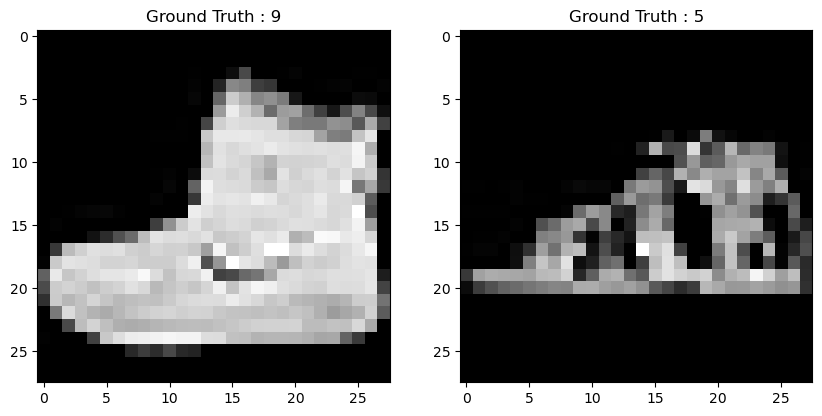

In [4]:
plt.figure(figsize=[10,10])

# Display na 1a imagem nos dados de treinamento:
plt.subplot(121)
plt.imshow(X_treino[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_treino[0]))

# Display na 11a image dos dados de teste:
plt.subplot(122)
plt.imshow(X_teste[11,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_teste[11]))

# Normalização

In [6]:
X_treino = X_treino.reshape(60000, 28,28, 1)
X_teste = X_teste.reshape(10000, 28,28, 1)

# Os dados agora estão em um formato int8, portanto, antes de alimentá-los na rede, você precisa converter para float32 
# e também redimensionar os valores de pixel no intervalo de 0 a 1. 

# OBS:a normalização de dados garante que cada parâmetro de entrada (pixel) tenha uma distribuição de dados semelhante.
# isso tornará a convergência mais rápida dutante o treinamento da rede.

X_treino = X_treino.astype('float32')
X_teste = X_teste.astype('float32')
X_treino = X_treino/255.0
X_teste= X_teste/255.0

In [7]:
# Images— 4D tensors of shape (samples, height, width, channels)

X_treino.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Alterando as labels de categóricas para one-hot encoding

In [8]:
from keras.utils import to_categorical

Y_treino_one_hot = to_categorical(Y_treino)
Y_teste_one_hot = to_categorical(Y_teste)

# Vamos olhar se a alteração deu certo:

print('Rótulo original:', Y_treino[0])
print('Após a conversão para one-hot:', Y_treino_one_hot[0])

Rótulo original: 9
Após a conversão para one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Criação do Modelo: 

In [9]:
from sklearn.model_selection import train_test_split

X_treino, X_validacao, label_treino, label_validacao = train_test_split(X_treino, Y_treino_one_hot, test_size=0.2, random_state=13)

In [10]:
X_treino.shape, X_validacao.shape, label_treino.shape, label_validacao.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [11]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


# Melhorar a reprodutibilidade
# # fixar o pseudo-random generator do numpy
np.random.RandomState(10)

# # fixar o pseudo-random generator do tensorflow
tf.random.set_seed(10)

#Ideia da rede: https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
#model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))             
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
#model.add(Dropout(0.4))
#FULL CONECTED LAYER
model.add(Flatten())
model.add(Dense(128, activation='relu'))    
#model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         


2023-03-08 21:16:41.680611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 21:16:41.683627: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
          

## Compilando e treinando o modelo: 

In [12]:
#alterando a taxa de aprendizado
#https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
opt = ke.optimizers.Adam(learning_rate=0.001)

In [13]:
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
print("os 5 primeiros parâmetros antes do treino")
print(model.get_weights()[0][0])

os 5 primeiros parâmetros antes do treino
[[[ 0.11347462 -0.07312004 -0.13401255  0.09619461  0.12633817
    0.03598826  0.00718141 -0.05373658 -0.10368581 -0.02751019
   -0.00720726  0.01351945 -0.0725425   0.05917205  0.12562038
   -0.06902364 -0.07282749 -0.10207674 -0.08430127  0.04263458
    0.05366887 -0.00789118  0.1108052   0.00466008  0.12579088
    0.08817016 -0.05495968 -0.02227039  0.04942493 -0.06165233
   -0.13954417 -0.02293658]]

 [[ 0.03234516  0.08653885  0.11735503 -0.11347973  0.04341914
   -0.11440712 -0.02119806  0.0544212   0.06021249  0.0320031
   -0.140948   -0.08857681  0.04636998 -0.02434704 -0.13520707
   -0.10357636 -0.09728988 -0.11081968  0.07062513  0.12661035
    0.08117506  0.13271277 -0.07060594  0.04585551  0.10489319
   -0.07963315  0.12927942  0.05994183  0.01883604  0.10043572
   -0.0592001  -0.09857577]]

 [[-0.05309476 -0.07144181  0.07589687 -0.00081855 -0.10569584
    0.06008928  0.10713683 -0.00663094 -0.0097867  -0.12574576
   -0.00400874 -0

In [15]:
# fixar estado de inicialização
history= model.fit(X_treino, label_treino, batch_size=64,epochs=20,
                           validation_data=(X_validacao, label_validacao),verbose= 1)

# batch size = o número de exemplos de treinamento em uma passagem para frente/trás.
# época = uma época descreve o número de vezes que o algoritmo vê o conjunto de dados inteiro.
# iteração  = descreve o número de vezes que um lote de dados passou pelo algoritmo (aqui a passagem para frente e para trás).
# altere verbose = 1 caso queira ir visualizando as épocas de treinamento.

Epoch 1/20
750/750 [==============================] - 40s 53ms/step - loss: 0.9547 - accuracy: 0.6456 - val_loss: 0.6863 - val_accuracy: 0.7493
Epoch 2/20
750/750 [==============================] - 50s 66ms/step - loss: 0.6151 - accuracy: 0.7708 - val_loss: 0.5662 - val_accuracy: 0.7911
Epoch 3/20
750/750 [==============================] - 32s 42ms/step - loss: 0.5277 - accuracy: 0.8062 - val_loss: 0.5439 - val_accuracy: 0.7891
Epoch 4/20
750/750 [==============================] - 33s 43ms/step - loss: 0.4738 - accuracy: 0.8251 - val_loss: 0.4722 - val_accuracy: 0.8283
Epoch 5/20
750/750 [==============================] - 41s 55ms/step - loss: 0.4362 - accuracy: 0.8407 - val_loss: 0.4273 - val_accuracy: 0.8401
Epoch 6/20
750/750 [==============================] - 36s 48ms/step - loss: 0.4090 - accuracy: 0.8490 - val_loss: 0.4138 - val_accuracy: 0.8497
Epoch 7/20
750/750 [==============================] - 37s 49ms/step - loss: 0.3851 - accuracy: 0.8573 - val_loss: 0.3967 - val_accuracy:

In [16]:
print("os 5 primeiros parâmetros depois do treino")
print(model.get_weights()[0][0])

os 5 primeiros parâmetros depois do treino
[[[ 1.33343697e+00 -7.88066760e-02 -1.39270768e-01  9.79356393e-02
    2.47066498e+00  3.27263400e-02 -7.56544590e-01 -5.80879673e-02
   -1.05401836e-01 -3.39427069e-02 -7.35943675e-01 -7.57646203e-01
   -7.77687207e-02  1.04955888e+00  1.22037515e-01 -8.34028542e-01
   -1.01998961e+00  1.50707257e+00  3.83311808e-01  1.26017237e+00
    8.90513122e-01 -1.64659619e-02  1.04134060e-01  9.76356398e-03
    5.39451063e-01  8.32684562e-02 -5.04227728e-02 -2.38573086e-02
    4.42832373e-02 -5.72769120e-02 -1.40547410e-01  7.55010068e-01]]

 [[ 6.37491167e-01  8.02843347e-02  1.11941226e-01 -1.13649197e-01
    9.09491241e-01 -1.11573897e-01 -1.03152204e+00  4.90800627e-02
    6.38499558e-02  2.60462184e-02 -1.71083391e+00 -1.81612718e+00
    4.12382260e-02  3.17671955e-01 -1.36366546e-01 -1.65794885e+00
   -1.67819691e+00  1.09541118e-01  5.96979976e-01  5.29641449e-01
    5.97493887e-01  1.25739560e-01 -7.87703395e-02  4.22614329e-02
    3.95549953e-

### Curvas de aprendizado

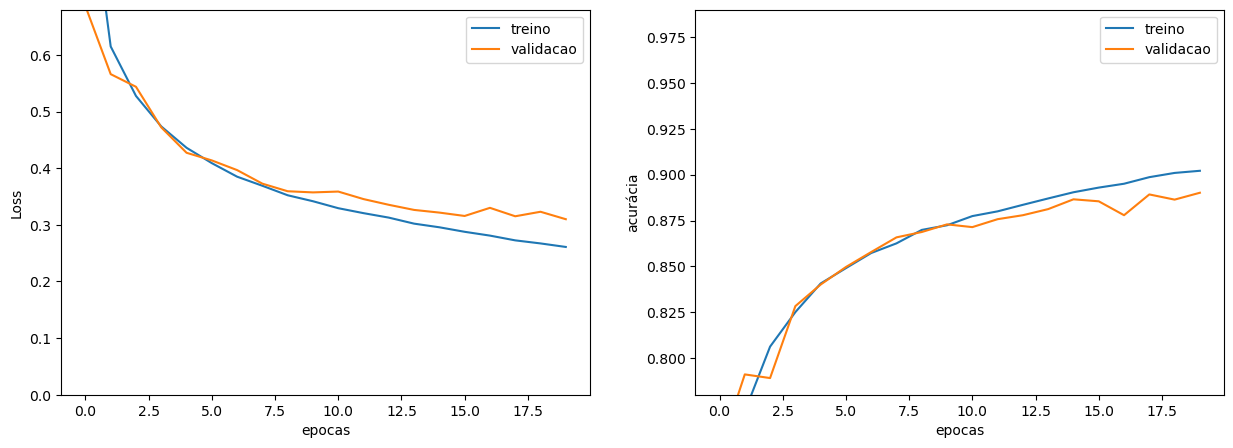

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.ylim([0.0, 0.68])
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.ylim([0.78, 0.99])
plt.legend();

### Relatório de classificação: TESTE DA REDE

In [18]:
from sklearn.metrics import classification_report

predicted_classes = model.predict(X_teste)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes.shape, Y_teste.shape

target_names = ["Class {}".format(i) for i in range(10)]

print(classification_report(Y_teste, predicted_classes, target_names=target_names))

313/313 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

     Class 0       0.66      0.89      0.75      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.86      0.74      0.80      1000
     Class 3       0.93      0.84      0.89      1000
     Class 4       0.79      0.84      0.82      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.75      0.63      0.69      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.98      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Métricas (calculadas através da matriz de confusão)

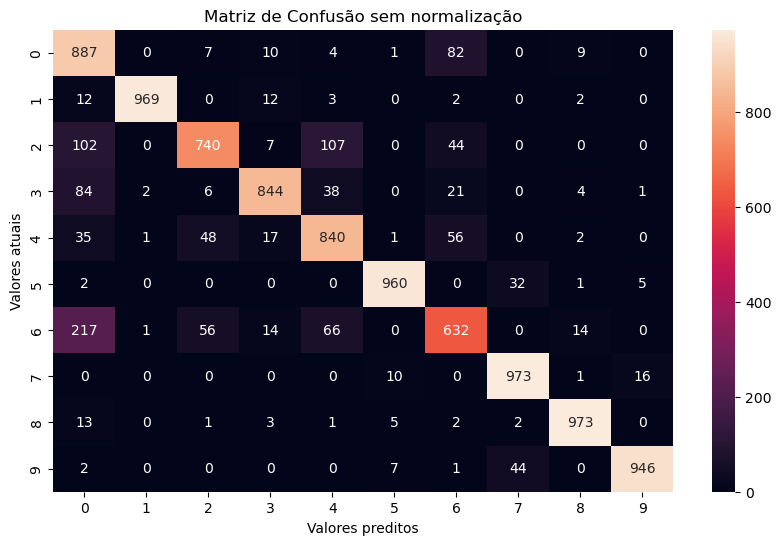

In [19]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(Y_teste, predicted_classes)

# Criando um dataframe para a matriz de confusão formatada em array, para que seja fácil de plotar.

cmat_df = pd.DataFrame(cmat,
                     index = ['0','1','2','3','4', '5', '6', '7', '8', '9' ], 
                     columns = ['0','1','2','3','4', '5', '6', '7', '8', '9' ])

#Plotando:
plt.figure(figsize=(10,6))
sns.heatmap(cmat_df, annot=True,fmt="d")
plt.title('Matriz de Confusão sem normalização')
plt.ylabel('Valores atuais')
plt.xlabel('Valores preditos')
plt.show()